<a href="https://colab.research.google.com/github/FullPowerMore02/data-mining/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_LSTM_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
!pip install yfinance

[*********************100%%**********************]  1 of 1 completed


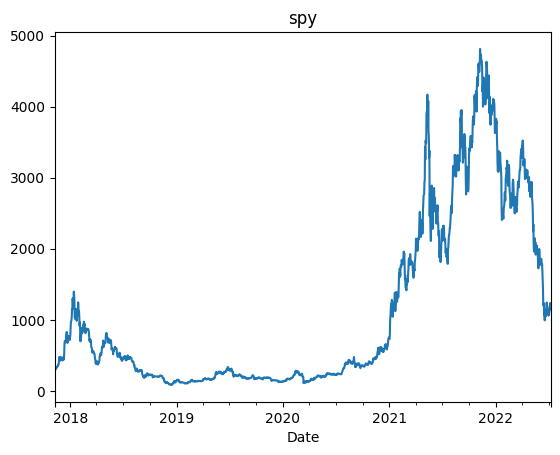

In [ ]:
import yfinance as yf
spy_df = data = yf.download(tickers = 'ETH-USD', start = '2012-03-11',end = '2022-07-10')

spy_df["Adj Close"].plot(title="spy");

LSTM

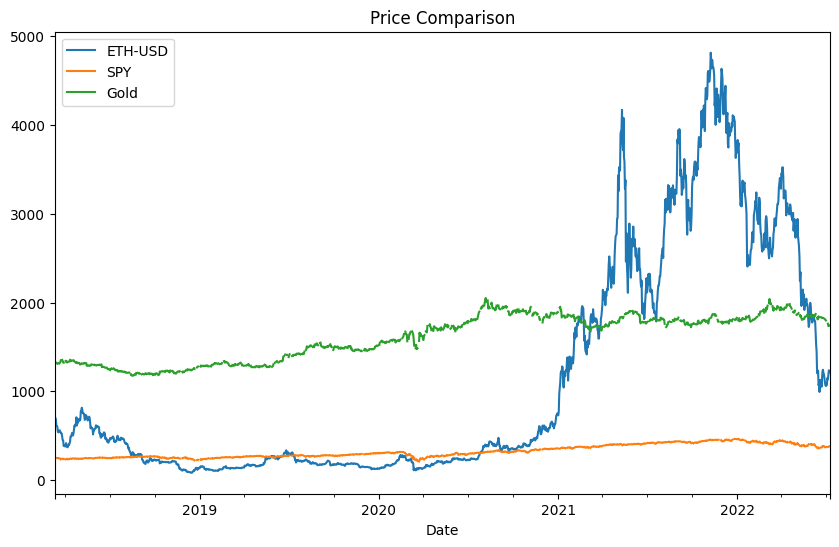

In [ ]:
##
import yfinance as yf
import matplotlib.pyplot as plt

# ดึงข้อมูลราคาของ ETH-USD, SPY, ทองคำ, และดัชนี Inflation
eth_df = yf.download(tickers='ETH-USD', start='2018-03-11', end='2022-07-10', progress=False)
spy500_df = yf.download(tickers='SPY', start='2018-03-11', end='2022-07-10', progress=False)
gold_df = yf.download(tickers='GC=F', start='2018-03-11', end='2022-07-10', progress=False)  # GC=F คือรหัสสัญลักษณ์สำหรับทองคำใน Yahoo Finance

# แปลง index ให้เป็น datetime
eth_df.index = pd.to_datetime(eth_df.index)
spy500_df.index = pd.to_datetime(spy500_df.index)  # แก้ชื่อตัวแปรเป็น spy500_df
gold_df.index = pd.to_datetime(gold_df.index)

# เลือกแค่คอลัมน์ 'Adj Close'
eth_adj_close = eth_df["Adj Close"]
spy500_adj_close = spy500_df["Adj Close"]  # แก้ชื่อตัวแปรเป็น spy500_adj_close
gold_adj_close = gold_df["Adj Close"]

# สร้าง DataFrame ที่รวมราคาของ ETH, SPY, ทองคำ
spy_df = pd.DataFrame({"ETH-USD": eth_adj_close, "SPY": spy500_adj_close, "Gold": gold_adj_close})

# Plot กราฟ
spy_df.plot(title="Price Comparison", figsize=(10, 6))
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
total = spy_df.isnull().sum().sort_values(ascending=False)
percent = (spy_df.isnull().sum()/spy_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
SPY,492,0.310999
Gold,492,0.310999
ETH-USD,0,0.000000


# Data Visualization

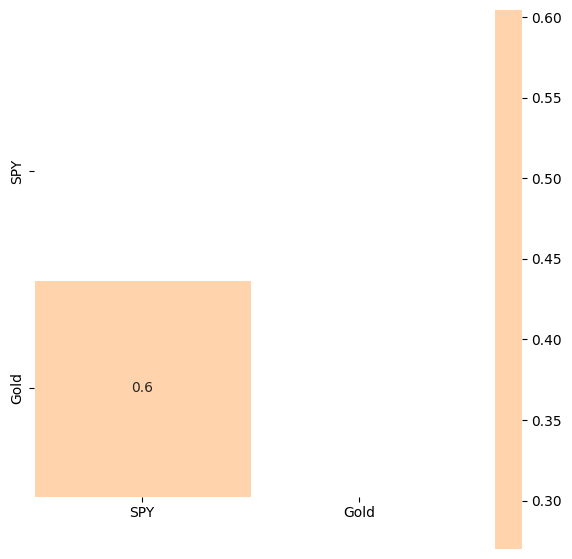

In [ ]:
#Plotting correlation
plt.figure(figsize=(7,7))
corr=spy_df[spy_df.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(spy_df[spy_df.columns[1:]].corr(), mask=mask, vmax=.3, center=0,
square=True, linewidths=.5,annot=True)
plt.show()

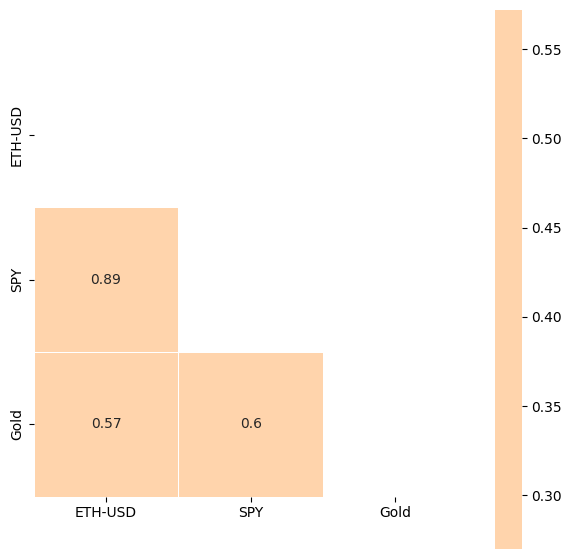

In [ ]:
##
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ดึงข้อมูลราคาของ ETH-USD, SPY, ทองคำ, และดัชนี Inflation
eth_df = yf.download(tickers='ETH-USD', start='2012-03-11', end='2022-07-10', progress=False)
spy500_df = yf.download(tickers='SPY', start='2012-03-11', end='2022-07-10', progress=False)
gold_df = yf.download(tickers='GC=F', start='2012-03-11', end='2022-07-10', progress=False)  # GC=F คือรหัสสัญลักษณ์สำหรับทองคำใน Yahoo Finance

# แปลง index ให้เป็น datetime
eth_df.index = pd.to_datetime(eth_df.index)
spy500_df.index = pd.to_datetime(spy500_df.index)
gold_df.index = pd.to_datetime(gold_df.index)

# เลือกแค่คอลัมน์ 'Adj Close'
eth_adj_close = eth_df["Adj Close"]
spy500_adj_close = spy500_df["Adj Close"]
gold_adj_close = gold_df["Adj Close"]

# สร้าง DataFrame ที่รวมราคาของ ETH, SPY, ทองคำ
spy_df = pd.DataFrame({"ETH-USD": eth_adj_close, "SPY": spy500_adj_close, "Gold": gold_adj_close, "ETH-USD": eth_adj_close})

# Plotting correlation
plt.figure(figsize=(7, 7))
corr = spy_df[spy_df.columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmax=.3, center=0, square=True, linewidths=.5, annot=True)
plt.show()



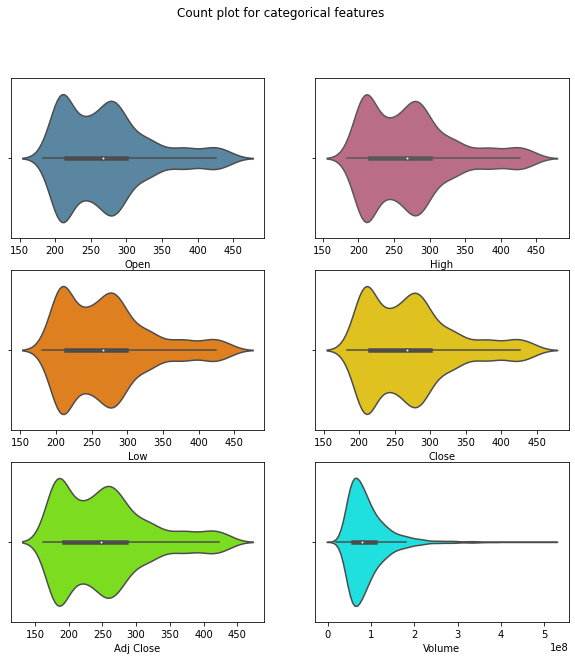

In [ ]:
fig,axes = plt.subplots(3,2,figsize = (10,10))
fig.suptitle("Count plot for categorical features")
#Open
sns.violinplot(ax=axes[0,0],data=spy_df,x='Open',color='#4e89ae')
#High
sns.violinplot(ax=axes[0,1],data=spy_df,x='High',color='#c56183')
#Low
sns.violinplot(ax=axes[1,0],data=spy_df,x='Low',color='#ff8000')
#Close
sns.violinplot(ax=axes[1,1],data=spy_df,x='Close',color='#ffd700')
#Adj Close
sns.violinplot(ax=axes[2,0],data=spy_df,x='Adj Close',color='#7cfC00')
#Volume
sns.violinplot(ax=axes[2,1],data=spy_df,x='Volume',color='#00FFFF')

#Preparing the Data

In [ ]:
spy_df['Volume'].fillna(value=0, inplace=True)
spy_df['Open'].fillna(method='ffill', inplace=True)
spy_df['High'].fillna(method='ffill', inplace=True)
spy_df['Low'].fillna(method='ffill', inplace=True)
spy_df['Close'].fillna(method='ffill', inplace=True)
spy_df['Adj Close'].fillna(method='ffill', inplace=True)

In [ ]:
spy_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
spy_df['Date'] = pd.to_datetime( spy_df.index)
spy_df.rename(columns = {'Close':'Price'}, inplace = True)

In [ ]:
spy_df['Date'] = spy_df['Date'].dt.tz_localize(None)
spy_df = spy_df.set_index('Date')
spy_df = spy_df[['Price']]

In [ ]:
#Splitting data
split_date = '2018-06-25'
data_train = spy_df.loc[spy_df.index <= split_date].copy()
data_test = spy_df.loc[spy_df.index > split_date].copy()

In [ ]:
#Data preprocessing
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

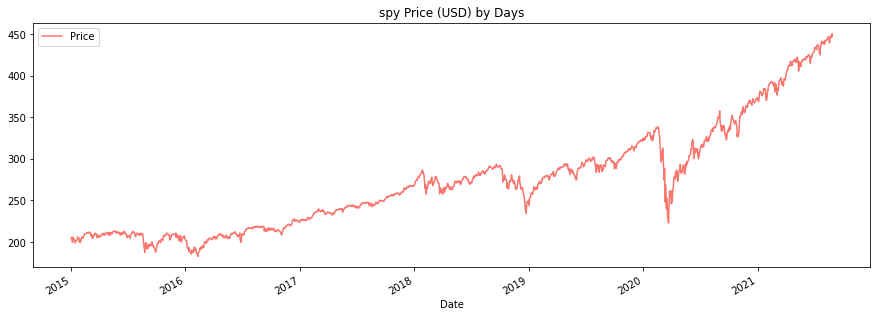

In [ ]:
#Historical price
_ = spy_df.plot(style='', figsize=(15,5), color="#F8766D", title='spy Price (USD) by Days')

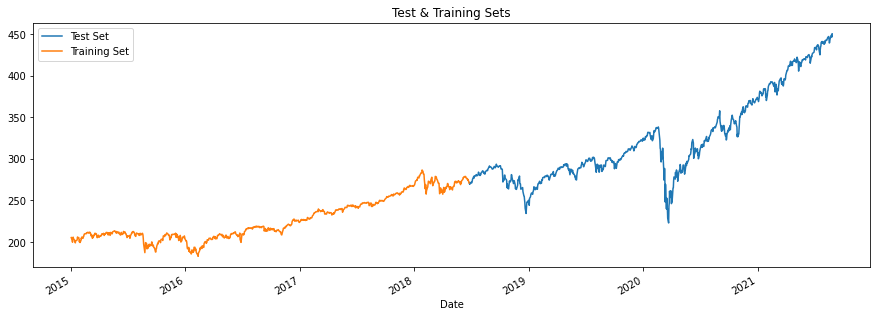

In [ ]:
#Plotting the test and training sets
_ = data_test.rename(columns={'Price': 'Test Set'}).join(data_train.rename(columns={'Price': 'Training Set'}), how='outer').plot(figsize=(15,5), title='Test & Training Sets', style='')

In [ ]:
#Creating the model
model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2)

Epoch 1/100
18/18 - 2s - loss: 0.3624 - 2s/epoch - 111ms/step
Epoch 2/100
18/18 - 0s - loss: 0.0989 - 86ms/epoch - 5ms/step
Epoch 3/100
18/18 - 0s - loss: 0.0965 - 86ms/epoch - 5ms/step
Epoch 4/100
18/18 - 0s - loss: 0.0882 - 111ms/epoch - 6ms/step
Epoch 5/100
18/18 - 0s - loss: 0.0839 - 92ms/epoch - 5ms/step
Epoch 6/100
18/18 - 0s - loss: 0.0831 - 83ms/epoch - 5ms/step
Epoch 7/100
18/18 - 0s - loss: 0.0809 - 87ms/epoch - 5ms/step
Epoch 8/100
18/18 - 0s - loss: 0.0826 - 76ms/epoch - 4ms/step
Epoch 9/100
18/18 - 0s - loss: 0.0750 - 80ms/epoch - 4ms/step
Epoch 10/100
18/18 - 0s - loss: 0.0712 - 116ms/epoch - 6ms/step
Epoch 11/100
18/18 - 0s - loss: 0.0719 - 81ms/epoch - 5ms/step
Epoch 12/100
18/18 - 0s - loss: 0.0732 - 129ms/epoch - 7ms/step
Epoch 13/100
18/18 - 0s - loss: 0.0713 - 146ms/epoch - 8ms/step
Epoch 14/100
18/18 - 0s - loss: 0.0677 - 136ms/epoch - 8ms/step
Epoch 15/100
18/18 - 0s - loss: 0.0604 - 82ms/epoch - 5ms/step
Epoch 16/100
18/18 - 0s - loss: 0.0632 - 87ms/epoch - 5ms/s

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Making the predictions
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_SPY = model.predict(inputs)
predicted_SPY = sc.inverse_transform(predicted_SPY)

25/25 [==============================] - 1s 5ms/step


In [ ]:
data_test['Price_Prediction'] = predicted_SPY
data_all = pd.concat([data_test, data_train], sort=False)

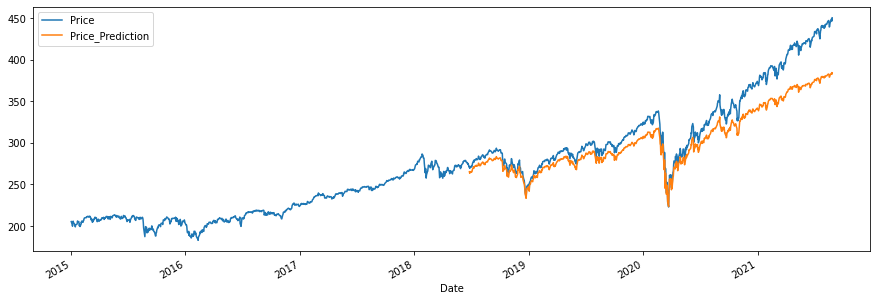

In [ ]:
_ = data_all[['Price','Price_Prediction']].plot(figsize=(15, 5))

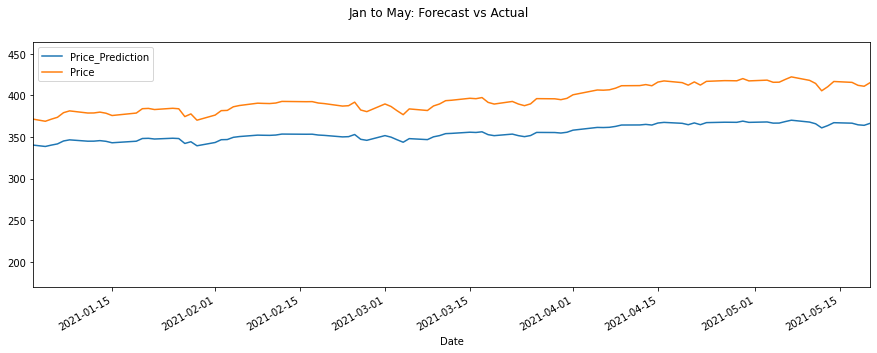

In [ ]:
#Plotting the forecast v/s actual price
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Price_Prediction','Price']].plot(ax=ax)
ax.set_xbound(lower='01-02-2021', upper='20-05-2021')
plot = plt.suptitle('Jan to May: Forecast vs Actual')

In [ ]:
#MSE
mean_squared_error(y_true=data_test['Price'],y_pred=data_test['Price_Prediction'])

639.5835132377863

In [ ]:
#MAE
mean_absolute_error(y_true=data_test['Price'],y_pred=data_test['Price_Prediction'])

19.532694854736327